In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\91892\\Python_practice'

In [3]:
os.chdir('C://Email_Spam_Detector')

In [4]:
os.getcwd()

'C:\\Email_Spam_Detector'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv', index_col='Category')
df.head()

,Message
Category,
ham,"Go until jurong point, crazy.. Available only ..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup fina...
ham,U dun say so early hor... U c already then say...
ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

<AxesSubplot:xlabel='Category', ylabel='Count'>

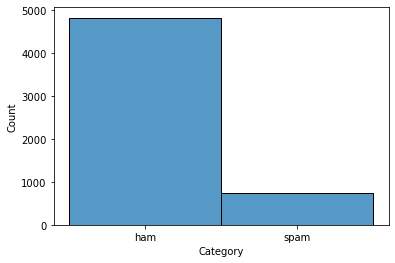

In [35]:
sns.histplot(df.index)

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  MultinomialNB
from sklearn.svm import SVC

In [37]:
le = LabelEncoder()
cont_vect = CountVectorizer()
tree = DecisionTreeClassifier()
ran = RandomForestClassifier()
lr = LogisticRegression()
mul_nb = MultinomialNB()
svc = SVC(kernel= 'linear')

In [38]:
from sklearn.pipeline import Pipeline

In [40]:
df['le_category'] = le.fit_transform(df.index)

In [41]:
df.head()

,Message,le_category
Category,,
ham,"Go until jurong point, crazy.. Available only ...",0
ham,Ok lar... Joking wif u oni...,0
spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
ham,U dun say so early hor... U c already then say...,0
ham,"Nah I don't think he goes to usf, he lives aro...",0


In [43]:
df.reset_index(drop=True, inplace=True)

In [48]:
df.set_index('le_category')

,Message
le_category,
0,"Go until jurong point, crazy.. Available only ..."
0,Ok lar... Joking wif u oni...
1,Free entry in 2 a wkly comp to win FA Cup fina...
0,U dun say so early hor... U c already then say...
0,"Nah I don't think he goes to usf, he lives aro..."
...,...
1,This is the 2nd time we have tried 2 contact u...
0,Will ü b going to esplanade fr home?
0,"Pity, * was in mood for that. So...any other s..."


In [67]:
X = df['Message']
y = df['le_category']

In [68]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [69]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: le_category, Length: 5572, dtype: int32

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [71]:
tree_pipe = Pipeline([('cv',CountVectorizer()),('tree',DecisionTreeClassifier())])
ran_pipe = Pipeline([('cv',CountVectorizer()),('ran',RandomForestClassifier())])
lr_pipe = Pipeline([('cv',CountVectorizer()),('lr',LogisticRegression())])
mul_nb_pipe = Pipeline([('cv',CountVectorizer()),('mul_nb',MultinomialNB())])
svc_pipe = Pipeline([('cv',CountVectorizer()),('svc',SVC(kernel= 'linear'))])

In [72]:
tree_pipe.fit(X_train,y_train) 
ran_pipe.fit(X_train,y_train) 
lr_pipe.fit(X_train,y_train) 
mul_nb_pipe.fit(X_train,y_train) 
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('svc', SVC(kernel='linear'))])

In [73]:
print('DecisionTreeClassifier',  tree_pipe.score(X_test,y_test))
print('RandomForestClassifier',  ran_pipe.score(X_test,y_test))
print('LogisticRegression',  lr_pipe.score(X_test,y_test))
print('MultinomialNB',  mul_nb_pipe.score(X_test,y_test))
print('SVC',  svc_pipe.score(X_test,y_test))

DecisionTreeClassifier 0.9709364908503767
RandomForestClassifier 0.9790096878363832
LogisticRegression 0.9768568353067815
MultinomialNB 0.9860064585575888
SVC 0.9833153928955867


In [74]:
emails = ['Hey mohan, can we get together to watch footbal game tomorrow?',
          'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']
print(tree_pipe.predict(emails))
print(ran_pipe.predict(emails)) 
print(lr_pipe.predict(emails))
print(mul_nb_pipe.predict(emails)) 
print(svc_pipe.predict(emails))

[0 0]
[0 0]
[0 0]
[0 1]
[0 0]


In [77]:
email2 = ['Hey, You have won reward!']
print(tree_pipe.predict(email2))
print(ran_pipe.predict(email2)) 
print(lr_pipe.predict(email2))
print(mul_nb_pipe.predict(email2)) 
print(svc_pipe.predict(email2))

[0]
[0]
[0]
[1]
[0]


In [78]:
import pickle

In [79]:
with open('tree_pipe', 'wb') as f:
    pickle.dump(tree_pipe, f)
with open('ran_pipe', 'wb') as f:
    pickle.dump(ran_pipe, f)
with open('lr_pipe', 'wb') as f:
    pickle.dump(lr_pipe, f)
with open('mul_nb_pipe', 'wb') as f:
    pickle.dump(mul_nb_pipe, f)
with open('svc_pipe', 'wb') as f:
    pickle.dump(svc_pipe, f)